In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [55]:
df.isnull().sum()

Dates     0
Prices    0
dtype: int64

In [56]:
df.shape

(48, 2)

In [57]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07')])

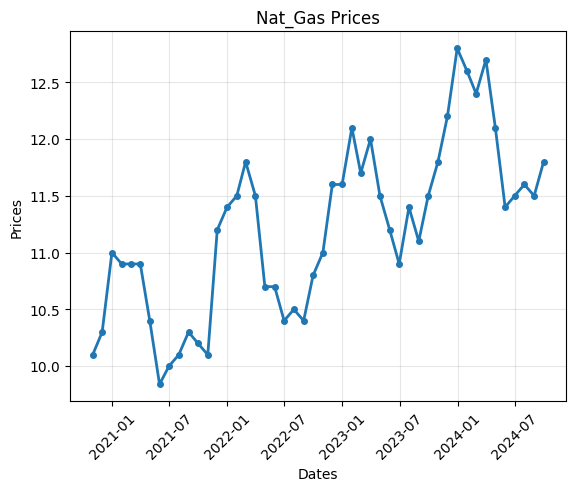

In [58]:
plt.plot(df['Dates'], df['Prices'], marker='o', linewidth=2, markersize=4)
plt.title('Nat_Gas Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

In [59]:
from prophet import Prophet

In [67]:
df.columns = [c.strip().lower() for c in df.columns]
date_col = [c for c in df.columns if "date" in c][0]
price_col = [c for c in df.columns if "price" in c][0]
data = df.rename(columns={date_col: "ds", price_col: "y"})
data["ds"] = pd.to_datetime(data["ds"], errors='coerce')
data = data.dropna(subset=["ds", "y"]).sort_values("ds")

In [68]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

model.fit(data)

19:22:06 - cmdstanpy - INFO - Chain [1] start processing
19:22:07 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

/Users/xuyibo/PycharmProjects/ML box/.venv1/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


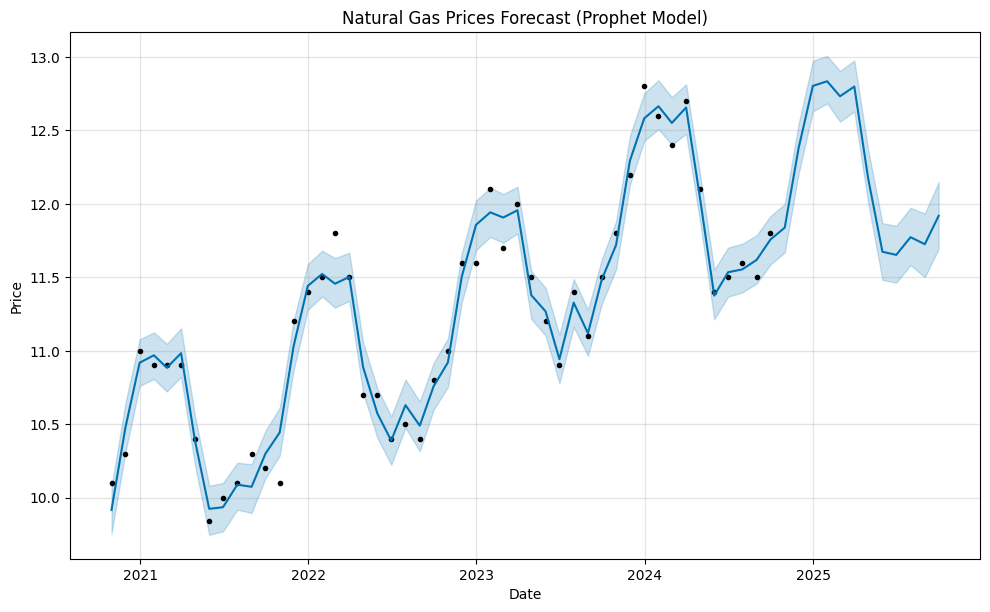

In [70]:
fig1 = model.plot(forecast)
plt.title("Natural Gas Prices Forecast (Prophet Model)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

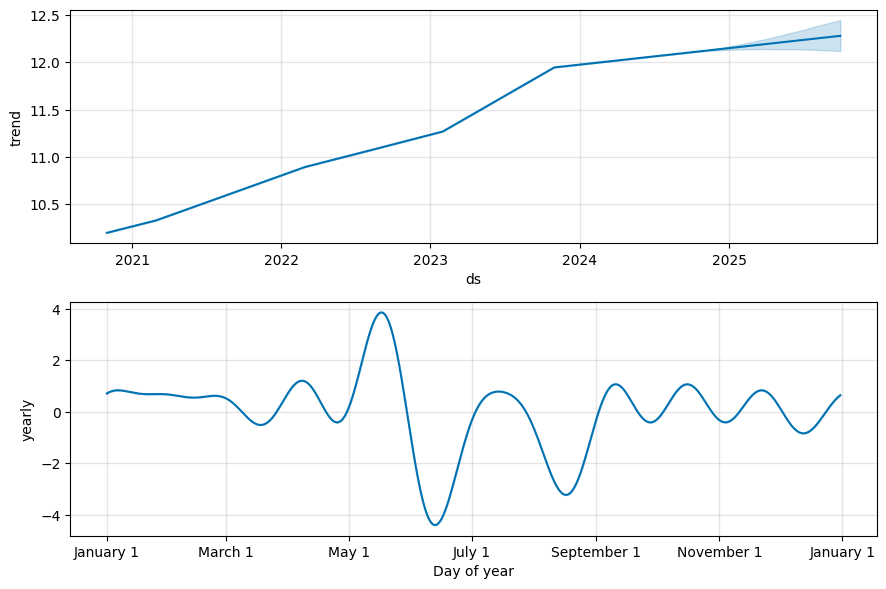

In [71]:
fig2 = model.plot_components(forecast)
plt.show()

In [72]:
def estimate_price(date_str):
    date = pd.to_datetime(date_str)
    future_df = pd.DataFrame({'ds': [date]})
    pred = model.predict(future_df)
    return float(pred['yhat'].iloc[0])

In [73]:
print("Predicted price on 2025-03-31:", estimate_price("2025-03-31"))

Predicted price on 2025-03-31: 12.799141931391027
